In [27]:
from read_data import load_data_graphmetrics as load_data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

In [51]:
d = load_data()

fields = ['Clustering_coeff', 'Assortativity', 'Assortativity_weighted', 'Clustering_coeff_weighted', 'Global_efficiency']

In [29]:
# Fonction qui sert à afficher les régions de décision

def plot_regions(predictor, axe, x_min, x_max, y_min, y_max):
    
    x_step = (x_max-x_min)/200
    y_step = (y_max-y_min)/200

    xx, yy = numpy.meshgrid(numpy.arange(x_min-15*x_step, x_max+15*x_step, x_step),
                         numpy.arange(y_min-15*y_step, y_max+15*y_step, y_step))
    
    Z = predictor.predict(numpy.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axe.imshow(Z, extent=(x_min, x_max, y_min, y_max), alpha=0.4, origin='lower', interpolation='none')


In [30]:
# import theano
# from theano import tensor

# class MLP:
    
#     def __init__(self, input_size=2, hiddens=[10], output_classes=2):
#         self.Ws = []
#         self.bs = []
#         for in_size, out_size in zip([input_size]+ hiddens, hiddens+[output_classes])
#             self.Ws.append(theano.shared(numpy))

In [31]:
d['alpha']

,Unnamed: 0,Subject_id,Session,Assortativity,Assortativity_weighted,Average_degree,Average_strength,Clustering_coeff,Clustering_coeff_weighted,Diameter,Edges,Global_efficiency,Maximum_degree,Maximum_strength,Mean_path_length,Minimum_degree,Minimum_strength,Total_degree,Total_strength,Vertices
0,0,monk01,rest,-0.246322,-0.225959,9.963303,32.550459,0.043127,0.013015,7.000000,543,0.440059,41,1011,2.685355,1,-894,1086,3548,109
1,1,monk02,rest,-0.402073,-0.414197,9.610619,-11.026549,0.095900,0.024928,6.000000,543,0.453021,56,1403,2.527497,1,-1469,1086,-1246,113
2,2,monk03,rest,-0.535459,-0.450322,10.442308,-95.076923,0.081027,0.031356,4.000000,543,0.505477,73,742,2.174944,1,-1400,1086,-9888,104
3,3,monk04,rest,-0.519305,-0.522318,10.442308,18.442308,0.163538,0.103813,4.000000,543,0.503221,67,1243,2.191934,1,-1564,1086,1918,104
4,4,monk05,rest,-0.559322,-0.547674,10.752475,48.772277,0.164525,0.037130,3.000000,543,0.537063,87,914,1.992673,1,-1174,1086,4926,101
5,5,monk06,rest,-0.394330,-0.269035,13.746835,-22.886076,0.061720,0.017205,4.000000,543,0.544385,43,1852,2.089581,1,-2215,1086,-1808,79
6,6,monk07,rest,-0.395108,-0.402046,9.050000,-6.450000,0.076739,0.032330,6.000000,543,0.449461,59,699,2.554482,1,-1281,1086,-774,120
7,7,monk08,rest,-0.263745,-0.228405,8.353846,-14.015385,0.051172,0.007759,6.000000,543,0.404683,37,644,2.856530,1,-630,1086,-1822,130
8,8,monk09,rest,-0.467313,-0.498388,8.829268,22.666667,0.111948,0.020939,5.000000,543,0.471045,68,526,2.346528,1,-796,1086,2788,123
9,9,monk10,rest,-0.148420,-0.115132,9.443478,74.800000,0.068927,0.041153,7.000000,543,0.425666,29,1054,2.737605,1,-730,1086,8602,115


In [32]:
session = d['alpha']['Session']
session_n = []

for i in session:                                                                                
    if i == 'rest':
        session_n.append(0)
    elif i == 'samatha':
        session_n.append(1)
    else:
        session_n.append(2)

## clustering coefficient 1 v 1

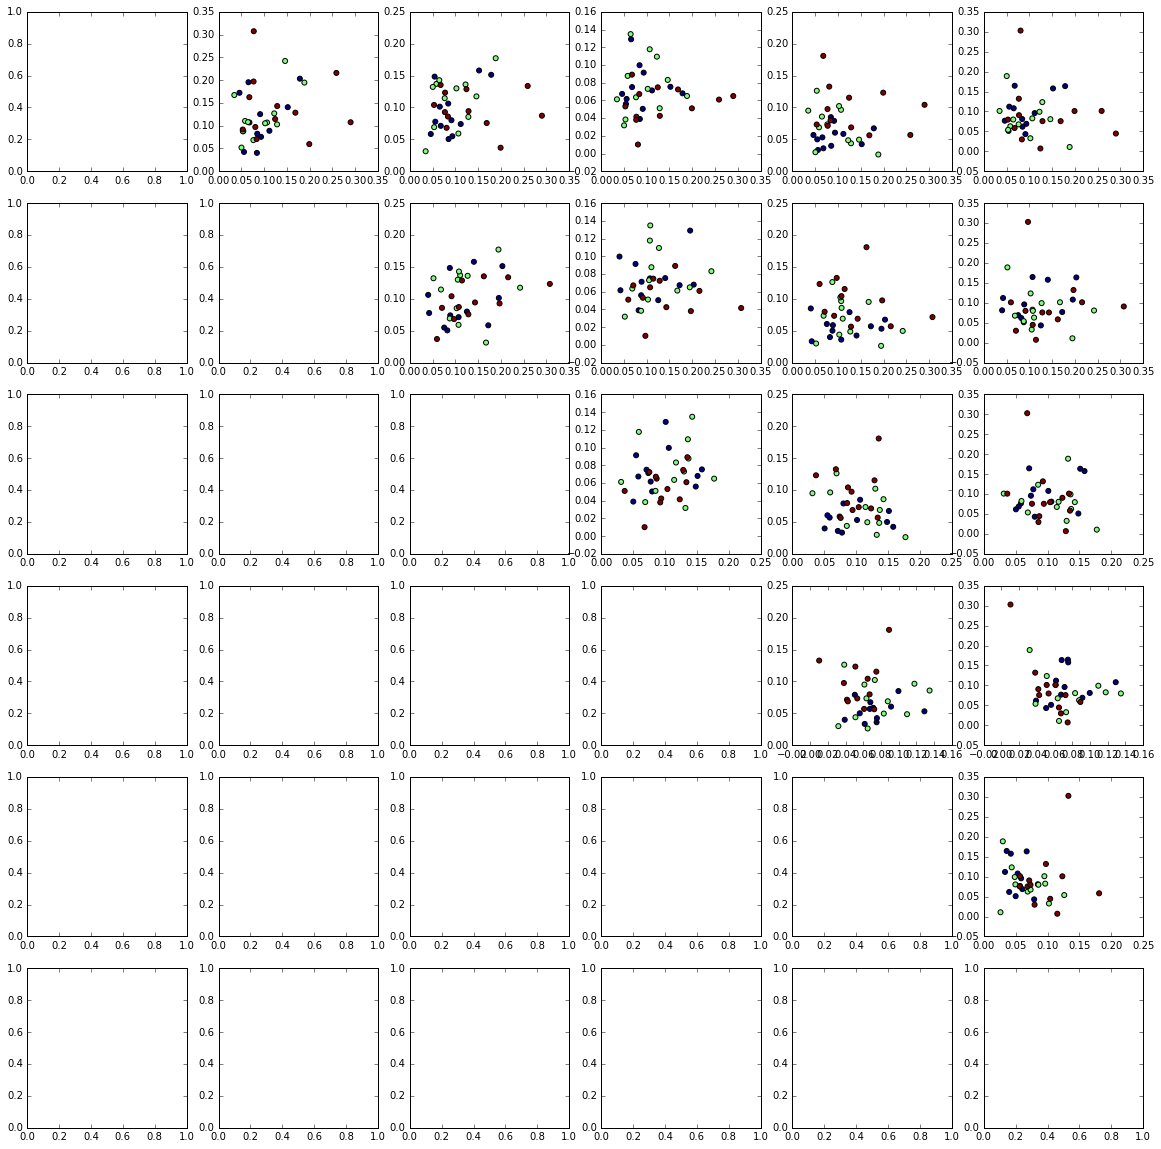

In [33]:
f, axarr = plt.subplots(len(d), len(d), figsize=(20, 20))
field_name = 'Clustering_coeff'

for i, k_i in enumerate(d.keys()):
    for j, k_j in enumerate(d.keys()):
        if j > i:
            axarr[i][j].scatter(d[k_i][field_name], d[k_j][field_name], marker='.', c=session_n,s=100)

plt.show()

## assortativity 1v1

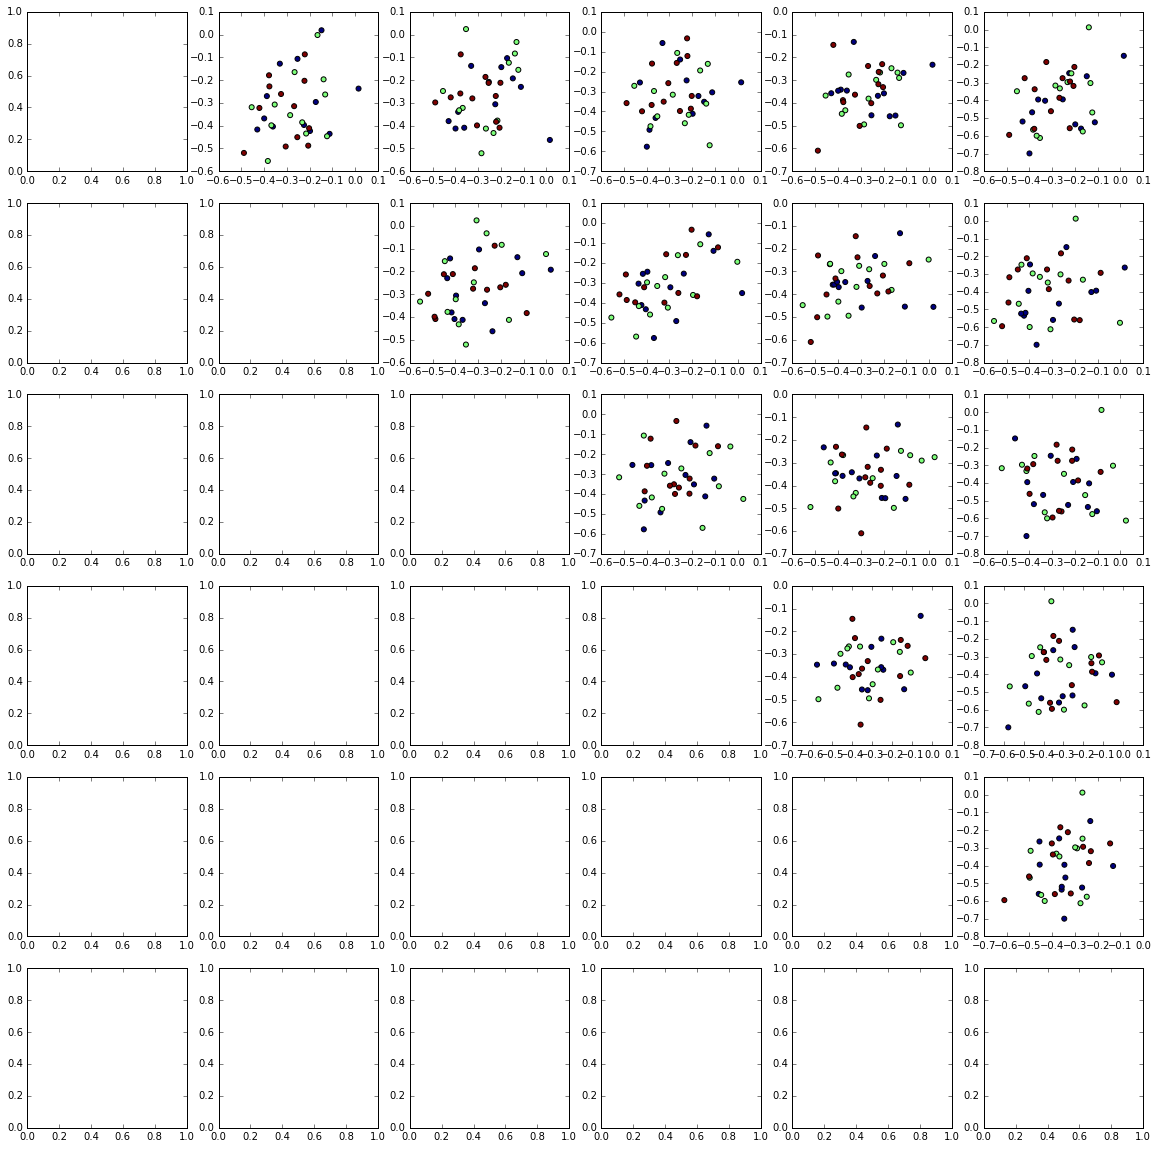

In [34]:
f, axarr = plt.subplots(len(d), len(d), figsize=(20, 20))
field_name = 'Assortativity'

for i, k_i in enumerate(d.keys()):
    for j, k_j in enumerate(d.keys()):
        if j > i:
            axarr[i][j].scatter(d[k_i][field_name], d[k_j][field_name], marker='.', c=session_n,s=100)

plt.show()

## Assortativity vs Clustering_coeff

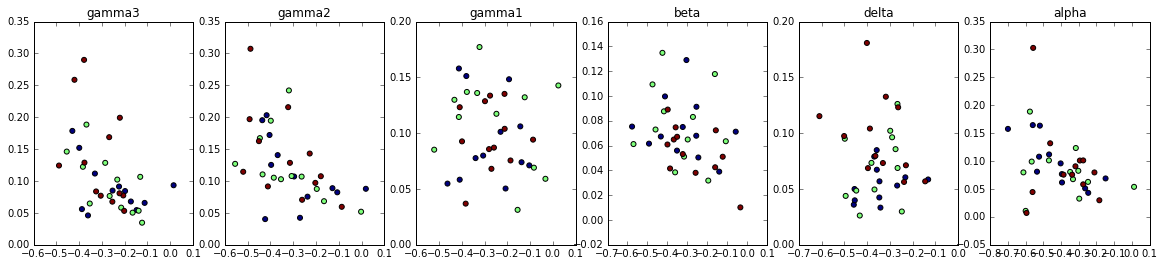

In [35]:
f, axarr = plt.subplots(1, len(d), figsize=(20, 4))
field1_name = 'Assortativity'
field2_name = 'Clustering_coeff'

for i, k_i in enumerate(d.keys()):
    axarr[i].scatter(d[k_i][field1_name], d[k_i][field2_name], marker='.', c=session_n ,s=100)
    axarr[i].set_title(k_i)

plt.show()

# Classif

## naive bayes 1 feat

In [36]:
from sklearn.naive_bayes import GaussianNB

for freq_band in d.keys():
    for field in ['Clustering_coeff', 'Assortativity', 'Assortativity_weighted', 'Clustering_coeff_weighted', 'Global_efficiency']:
        gnb = GaussianNB()
        y_fit = gnb.fit(d[freq_band][field][:,None], numpy.array(session_n))
        y_pred = y_fit.predict(d[freq_band][field][:,None])

        print freq_band, field
        print 'Misclassified:', (y_pred != numpy.array(session_n)).sum(), len(session_n)

gamma3 Clustering_coeff
Misclassified: 19 36
gamma3 Assortativity
Misclassified: 23 36
gamma3 Assortativity_weighted
Misclassified: 20 36
gamma3 Clustering_coeff_weighted
Misclassified: 21 36
gamma3 Global_efficiency
Misclassified: 17 36
gamma2 Clustering_coeff
Misclassified: 25 36
gamma2 Assortativity
Misclassified: 24 36
gamma2 Assortativity_weighted
Misclassified: 24 36
gamma2 Clustering_coeff_weighted
Misclassified: 23 36
gamma2 Global_efficiency
Misclassified: 21 36
gamma1 Clustering_coeff
Misclassified: 21 36
gamma1 Assortativity
Misclassified: 19 36
gamma1 Assortativity_weighted
Misclassified: 22 36
gamma1 Clustering_coeff_weighted
Misclassified: 19 36
gamma1 Global_efficiency
Misclassified: 21 36
beta Clustering_coeff
Misclassified: 19 36
beta Assortativity
Misclassified: 24 36
beta Assortativity_weighted
Misclassified: 22 36
beta Clustering_coeff_weighted
Misclassified: 19 36
beta Global_efficiency
Misclassified: 23 36
delta Clustering_coeff
Misclassified: 18 36
delta Assortat

## mlp 1 feat

In [37]:
from sklearn.neural_network import MLPClassifier

for freq_band in d.keys():
    for field in ['Clustering_coeff', 'Assortativity', 'Assortativity_weighted', 'Clustering_coeff_weighted', 'Global_efficiency']:
        mlp = MLPClassifier((10,))
        y_fit = mlp.fit(d[freq_band][field][:,None], numpy.array(session_n))
        y_pred = y_fit.predict(d[freq_band][field][:,None])

        print freq_band, field
        print 'Misclassified:', (y_pred != numpy.array(session_n)).sum(), len(session_n)

gamma3 Clustering_coeff
Misclassified: 22 36
gamma3 Assortativity
Misclassified: 23 36
gamma3 Assortativity_weighted
Misclassified: 22 36
gamma3 Clustering_coeff_weighted
Misclassified: 24 36
gamma3 Global_efficiency
Misclassified: 24 36
gamma2 Clustering_coeff
Misclassified: 24 36
gamma2 Assortativity
Misclassified: 24 36
gamma2 Assortativity_weighted
Misclassified: 24 36
gamma2 Clustering_coeff_weighted
Misclassified: 24 36
gamma2 Global_efficiency
Misclassified: 21 36
gamma1 Clustering_coeff
Misclassified: 24 36
gamma1 Assortativity
Misclassified: 24 36
gamma1 Assortativity_weighted
Misclassified: 24 36
gamma1 Clustering_coeff_weighted
Misclassified: 24 36
gamma1 Global_efficiency
Misclassified: 24 36
beta Clustering_coeff
Misclassified: 24 36
beta Assortativity
Misclassified: 24 36
beta Assortativity_weighted
Misclassified: 25 36
beta Clustering_coeff_weighted
Misclassified: 24 36
beta Global_efficiency
Misclassified: 24 36
delta Clustering_coeff
Misclassified: 21 36
delta Assortat

## naive bayes 2 feat

In [59]:
from sklearn.naive_bayes import GaussianNB

names = []
vals = []

for i, freq_band1 in enumerate(d.keys()):
    for j, freq_band2 in enumerate(d.keys()):
        for field1 in ['Clustering_coeff', 'Assortativity', 'Assortativity_weighted', 'Clustering_coeff_weighted', 'Global_efficiency']:
            for field2 in ['Clustering_coeff', 'Assortativity', 'Assortativity_weighted', 'Clustering_coeff_weighted', 'Global_efficiency']:
                x = numpy.concatenate((d[freq_band1][field1][:,None], d[freq_band2][field2][:,None]), 1)
                gnb = GaussianNB()
                y_fit = gnb.fit(x, numpy.array(session_n))
                y_pred = y_fit.predict(x)

                print freq_band1, freq_band2, field1, field2
                misclas = (y_pred != numpy.array(session_n)).sum()
                print 'Misclassified:', misclas, len(session_n)
                
                names.append('%s %s %s %s' % (freq_band1, freq_band2, field1, field2))
                vals.append(misclas)
                
amin = numpy.argmin(vals)
print names[amin], vals[amin]

gamma3 gamma3 Clustering_coeff Clustering_coeff
Misclassified: 19 36
gamma3 gamma3 Clustering_coeff Assortativity
Misclassified: 21 36
gamma3 gamma3 Clustering_coeff Assortativity_weighted
Misclassified: 19 36
gamma3 gamma3 Clustering_coeff Clustering_coeff_weighted
Misclassified: 20 36
gamma3 gamma3 Clustering_coeff Global_efficiency
Misclassified: 18 36
gamma3 gamma3 Assortativity Clustering_coeff
Misclassified: 21 36
gamma3 gamma3 Assortativity Assortativity
Misclassified: 23 36
gamma3 gamma3 Assortativity Assortativity_weighted
Misclassified: 23 36
gamma3 gamma3 Assortativity Clustering_coeff_weighted
Misclassified: 22 36
gamma3 gamma3 Assortativity Global_efficiency
Misclassified: 20 36
gamma3 gamma3 Assortativity_weighted Clustering_coeff
Misclassified: 19 36
gamma3 gamma3 Assortativity_weighted Assortativity
Misclassified: 23 36
gamma3 gamma3 Assortativity_weighted Assortativity_weighted
Misclassified: 20 36
gamma3 gamma3 Assortativity_weighted Clustering_coeff_weighted
Misclass

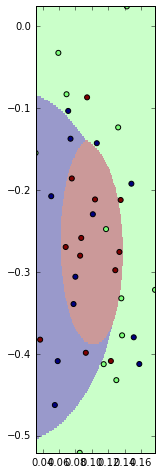

In [39]:
plt.figure(figsize=(10, 8))

x1 = d['gamma1']['Clustering_coeff'][:,None]
x2 = d['gamma1']['Assortativity'][:,None]
x = numpy.concatenate((x1, x2), 1)

gnb = GaussianNB()
y_fit = gnb.fit(x, numpy.array(session_n))
y_pred = y_fit.predict(x)

plt.scatter(x1, x2, marker='.', c=session_n, s=100)

plot_regions(gnb, plt, x1.min(), x1.max(), x2.min(), x2.max())
plt.show()

In [40]:
names = []
vals = []
out = (numpy.array(session_n)>0)*1.

for i, freq_band1 in enumerate(d.keys()):
    for j, freq_band2 in enumerate(d.keys()):
        for field1 in ['Clustering_coeff', 'Assortativity']:
            for field2 in ['Clustering_coeff', 'Assortativity']:
            
                x = numpy.concatenate((d[freq_band1][field1][:,None], d[freq_band2][field2][:,None]), 1)
                mlp = MLPClassifier((10,))
                
                y_fit = mlp.fit(x, out)
                y_pred = y_fit.predict(x)

                print freq_band1, freq_band2, field1, field2
                misclas = (y_pred != out).sum()
                print 'Misclassified:', misclas, len(session_n)
                
                names.append('%s %s %s %s' % (freq_band1, freq_band2, field1, field2))
                vals.append(misclas)
                
amin = numpy.argmin(vals)
print names[amin], vals[amin]

gamma3 gamma3 Clustering_coeff Clustering_coeff
Misclassified: 12 36
gamma3 gamma3 Clustering_coeff Assortativity
Misclassified: 12 36
gamma3 gamma3 Assortativity Clustering_coeff
Misclassified: 12 36
gamma3 gamma3 Assortativity Assortativity
Misclassified: 12 36
gamma3 gamma2 Clustering_coeff Clustering_coeff
Misclassified: 24 36
gamma3 gamma2 Clustering_coeff Assortativity
Misclassified: 12 36
gamma3 gamma2 Assortativity Clustering_coeff
Misclassified: 12 36
gamma3 gamma2 Assortativity Assortativity
Misclassified: 12 36
gamma3 gamma1 Clustering_coeff Clustering_coeff
Misclassified: 12 36
gamma3 gamma1 Clustering_coeff Assortativity
Misclassified: 12 36
gamma3 gamma1 Assortativity Clustering_coeff
Misclassified: 12 36
gamma3 gamma1 Assortativity Assortativity
Misclassified: 12 36
gamma3 beta Clustering_coeff Clustering_coeff
Misclassified: 12 36
gamma3 beta Clustering_coeff Assortativity
Misclassified: 12 36
gamma3 beta Assortativity Clustering_coeff
Misclassified: 12 36
gamma3 beta A

## naive bayes all features

In [56]:
import itertools

d_all = numpy.concatenate([d[freq][field][:, None]
                           for freq, field in itertools.product(d.keys(), fields)], axis=1)

In [60]:
gnb = GaussianNB()
y_fit = gnb.fit(d_all, numpy.array(session_n))
y_pred = y_fit.predict(d_all)

print freq_band1, freq_band2, field1, field2
misclas = (y_pred != numpy.array(session_n)).sum()
print 'Misclassified:', misclas, len(session_n)

alpha alpha Global_efficiency Global_efficiency
Misclassified: 8 36


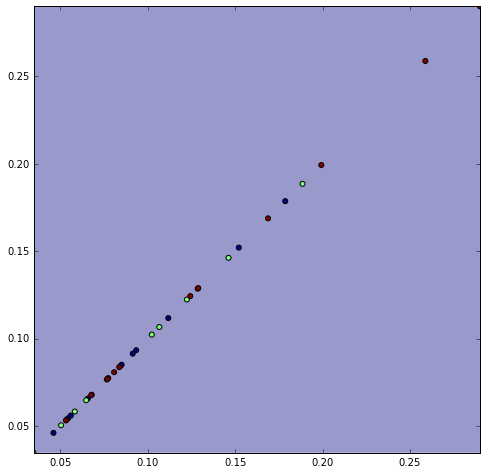

In [41]:
plt.figure(figsize=(10, 8))

x1 = d['gamma3']['Clustering_coeff'][:,None]
x2 = d['gamma3']['Clustering_coeff'][:,None]
x = numpy.concatenate((x1, x2), 1)

mlp = MLPClassifier()
y_fit = mlp.fit(x, out)
y_pred = y_fit.predict(x)

plt.scatter(x1, x2, marker='.', c=session_n, s=100)

plot_regions(gnb, plt, x1.min(), x1.max(), x2.min(), x2.max())
plt.show()

In [42]:
from scipy.io import loadmat

In [43]:
d1 = loadmat('/data/lisa/data/neuro/Meditation/time-series/cortex/monk01_rest.mat')
d2 = loadmat('/data/lisa/data/neuro/Meditation/time-series/cortex_aseg/monk01_rest.mat')

In [44]:
d1

{'F': array([[  3294.76961823,   4238.13837507,   2068.07815013, ...,
         -14510.12329646,  -7681.78098932,  -1548.43772705],
        [  -566.12345316,   1876.4786333 ,   5290.55307758, ...,
         -10540.85111507,  -4855.60477468,  -1036.67358971],
        [   649.77840627,   -575.09185102,  -4219.84697734, ...,
          17043.27054401,   8401.5445458 ,   1698.3297619 ],
        ..., 
        [ -1498.29960364,   -345.15808264,   2062.53217383, ...,
           4212.87193831,   2007.38886197,    348.99150759],
        [  1527.07505577,   6476.97569677,  11141.90492796, ...,
          -6117.82964342,  -4134.30940217,  -1215.14146802],
        [ -8617.56451733, -22001.9314657 , -23858.71136304, ...,
         -11291.24121926,  -4994.38616837,  -1084.67190212]]),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri May 06 12:25:34 2016',
 '__version__': '1.0'}

In [45]:
F1 = d1['F']
F2 = d2['F']

In [46]:
print F1.shape
print F2.shape

(148, 296419)
(165, 296419)


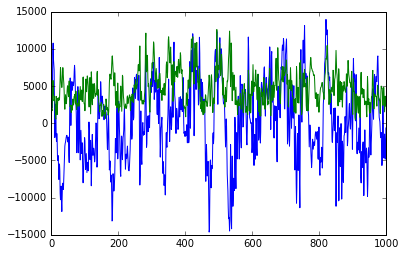

In [47]:
plt.plot(F1[0,:1000])
plt.plot(F2[0,:1000])

In [48]:
d_ = loadmat('/data/lisa/data/neuro/Meditation/connectivity/imcoh_source/conmat_monk03_samatha_gamma3.mat')

In [49]:
conmat = d_['conmat']

In [50]:
conmat


array([[  0.00000000e+00,  -1.73008728e-03,  -1.18114235e-03, ...,
         -7.42959680e-03,   8.60972235e-04,  -8.58941403e-03],
       [ -1.73008728e-03,   0.00000000e+00,   1.05643484e-04, ...,
          2.10412566e-03,   5.34907052e-04,   5.13454234e-03],
       [ -1.18114235e-03,   1.05643484e-04,   0.00000000e+00, ...,
          4.55142807e-03,  -8.04845465e-05,   7.66210320e-03],
       ..., 
       [ -7.42959680e-03,   2.10412566e-03,   4.55142807e-03, ...,
          0.00000000e+00,  -6.48836298e-03,  -1.82226245e-03],
       [  8.60972235e-04,   5.34907052e-04,  -8.04845465e-05, ...,
         -6.48836298e-03,   0.00000000e+00,   7.86780726e-03],
       [ -8.58941403e-03,   5.13454234e-03,   7.66210320e-03, ...,
         -1.82226245e-03,   7.86780726e-03,   0.00000000e+00]])